# Sales Analysis

### Import libraries

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import glob

-----------

#### Task 1a: Merge the 12 months of sales data to single csv file

In [322]:
'''sales_files = glob.glob('./Sales_Data/Sales_*.csv')
df_list = [pd.read_csv(files) for files in sales_files]
data_list = pd.concat(df_list)
data_list.to_csv('all_data.csv', index=False)'''

"sales_files = glob.glob('./Sales_Data/Sales_*.csv')\ndf_list = [pd.read_csv(files) for files in sales_files]\ndata_list = pd.concat(df_list)\ndata_list.to_csv('all_data.csv', index=False)"

------------

#### Task 1b: Upload new data sheet

In [323]:
df = pd.read_csv('all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


-------------

#### Task 1c: Clean up the data

In [324]:
# See how many rows of NaN
nan_df = df[df.isna().any(axis=1)]

# Drop rows of NaN
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [325]:
# Find the error value from Month column
df = df[df['Order Date'].str[0:2] != 'Or']

-----------------

#### Task 2a: Investigate Data Frame for titles, data types, and number of columns and rows

In [326]:
df.info

<bound method DataFrame.info of        Order ID                   Product Quantity Ordered Price Each  \
0        141234                    iPhone                1        700   
1        141235  Lightning Charging Cable                1      14.95   
2        141236          Wired Headphones                2      11.99   
3        141237          27in FHD Monitor                1     149.99   
4        141238          Wired Headphones                1      11.99   
...         ...                       ...              ...        ...   
186845   295660    AAA Batteries (4-pack)                2       2.99   
186846   295661      USB-C Charging Cable                1      11.95   
186847   295662  Lightning Charging Cable                1      14.95   
186848   295663    AAA Batteries (4-pack)                1       2.99   
186849   295664              Google Phone                1        600   

            Order Date                       Purchase Address  
0       01/22/19 21:25     

---------------

#### Task 2b: Change the data types of object to number and dates

In [361]:
def to_nums(col:str):
    df[col] = pd.to_numeric(df[col])
    return df[col]

In [328]:
to_nums('Quantity Ordered')
to_nums('Price Each');

----------

#### Task 2c: Add a month column with order date and change it to integer

In [329]:
df['Month'] = df['Order Date'].str[0:2]
to_nums('Month')
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

-----

#### Task 3a: Add sales column and calculate it for the values

In [330]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


----

#### Task 3b: Add the city column

In [331]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


### What is best month for sales? How much was earned that month?

In [336]:
result_sales = df.groupby('Month').sum()['Sales']
result_sales.sort_values(ascending=False)

Month
12    4.613443e+06
10    3.736727e+06
4     3.390670e+06
11    3.199603e+06
5     3.152607e+06
3     2.807100e+06
7     2.647776e+06
6     2.577802e+06
8     2.244468e+06
2     2.202022e+06
9     2.097560e+06
1     1.822257e+06
Name: Sales, dtype: float64

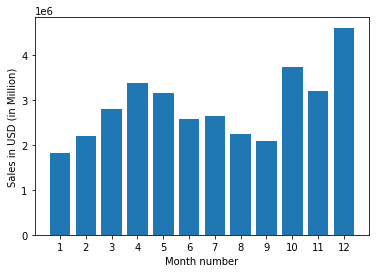

In [358]:
months = range(1,13)
plt.bar(months, result_sales)
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Sales in USD (in Million)')
plt.show()

#### Best Month for Sales:
* April (USD 3.390.670.000)
* October (USD 3.736.727.000)
* December (USD 4.613.443.000)

--------

### What city had the highest number of sales?

In [340]:
result_city_sales = df.groupby('City').sum()['Sales']
result_city_sales.sort_values(ascending=False)

City
 San Francisco (CA)    8.262204e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Boston (MA)           3.661642e+06
 Atlanta (GA)          2.795499e+06
 Dallas (TX)           2.767975e+06
 Seattle (WA)          2.747755e+06
 Portland (OR)         1.870732e+06
 Austin (TX)           1.819582e+06
 Portland (ME)         4.497583e+05
Name: Sales, dtype: float64

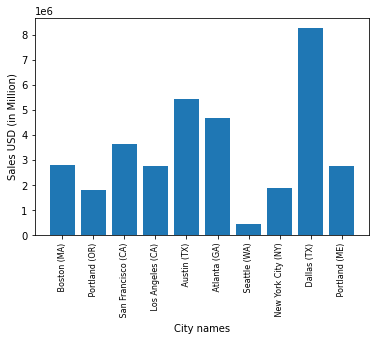

In [352]:
cities = df['City'].unique()

plt.bar(cities, result_city_sales)
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('City names')
plt.ylabel('Sales USD (in Million)')
plt.show()

#### Best City for Highest Sales:
* San Francisco, CA (USD 8.262.204.000)
* Los Angeles, CA (USD 5.452.571.000)
* New York City, NY (USD 4.664.317.000)

### What time should we display advertisement to maximize customer buying product?

In [347]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59


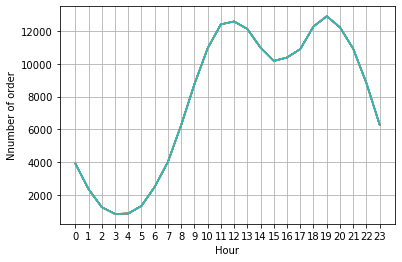

In [357]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of order')
plt.show()

#### Best Hour to Display Advertising:
* Display at 11am (11:00)
* Display at 12am (12:00)
* Display at 7pm (19:00)

--------

### What products are most often sold together?

In [360]:
dupe_order = df[df['Order ID'].duplicated(keep=False)]
dupe_order.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin (TX),16,6
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin (TX),16,6
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles (CA),8,25
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles (CA),8,25
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City (NY),11,19
134,141365,Wired Headphones,1,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,11.99,New York City (NY),11,19
153,141384,Google Phone,1,600.00,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,600.00,Boston (MA),0,14
154,141384,USB-C Charging Cable,1,11.95,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,11.95,Boston (MA),0,14
220,141450,Google Phone,1,600.00,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,600.00,San Francisco (CA),11,16
221,141450,Bose SoundSport Headphones,1,99.99,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,99.99,San Francisco (CA),11,16
